# 使用numpy做科学计算

numpy自带了许多数学工具.scipy则是其补充.通常情况下,这numpy提供的函数已经足够相对复杂的算法来使用了

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## 精度

科学计算的一个核心点在于精度,numpy的默认精度是64位的浮点数.最高的精度可以用`numpy.longdouble`(f16)表示，复数用`numpy.clongdouble`(c32)，但是这个具体能精确到多少是和你的电脑硬件相关的.

通常我们并不需要最高精度,这时可以使用`numpy.around(a, decimals=0, out=None)`来控制精度,其中a为要固定精度的数组,decimals则是精确到小数点后多少位(四舍五入).

In [45]:
x = np.linspace(-np.pi, np.pi, 6,endpoint=True)
print(x)

[-3.14159265 -1.88495559 -0.62831853  0.62831853  1.88495559  3.14159265]


In [46]:
np.round(x)

array([-3., -2., -1.,  1.,  2.,  3.])

In [47]:
np.round(x,1)

array([-3.1, -1.9, -0.6,  0.6,  1.9,  3.1])

In [48]:
np.round(x,2)

array([-3.14, -1.88, -0.63,  0.63,  1.88,  3.14])

## 数值计算


### 一元运算

函数|说明
---|---
abs/fabs|绝对值
sqrt|平方根
square|平方
exp|指数
log/log10/log2/log1p|分别为自然对数(e为底数)/底数为10的log/底数为2的log/log(1+x)
sign|求符号
ceil|大于等于该值的最小整数
floor|小于等于该值的最大整数
rint|四舍五入到最近的整数,dtype不变
modf|小数整数部分分离
isnan|---
isfinite/isinf|---
sin/sinh/cos/cosh/tan/tanh|三角函数,双曲三角函数
arcsin/arcsinh/arccos/arccosh/arctan/arctanh|反三角函数,反双曲三角函数
logical_not|计算各元素not x的真值


### 二元运算
函数|说明
---|---
add|加
subtract|减
multiply|乘
divide/floor_divide|除
power|乘方
maximun/fmax|最大值
minimum/fmin|最小值
mod|求模
copysign|将后面的符号付给前面


## 统计计算


**统计运算**|说明
---|---
sum|统计求和
mean|均值
average|加权求均值
median|中值
std|标准差
var|方差
min|最小值
argmin|最小值下标
max|最大值
argmax|最大值下标
ptp|最大值和最小值之差
sort|排序
argsort|排序下标
unique|找出所有整数(不会出现重复),并排序,</br>可选参数return_index=True,会额外返回一个记录下标的数组</br>可选return_inverse=True,会额外返回一个下标数组,数组长度为原始数组,表示原始数组中对应的下标
bincount|对整数数组个元素出现次数统计,可选参数weight,可以对各个元素加权


其中很多运算还有个`nanxxx`版本,用来求相应函数去掉nan值得结果

### 统计频数bincount

In [56]:
a = np.random.randint(0,5,10)
a

array([4, 2, 1, 0, 4, 1, 2, 0, 0, 4])

In [57]:
np.bincount(a)

array([3, 2, 2, 0, 3])

In [58]:
np.bincount(a,np.random.rand(10))

array([1.77790282, 1.54781066, 0.59637056, 0.        , 1.80685802])

### 相关性

numpy提供了3种算相关性的操作

+ `orrcoef(x, y=None, rowvar=1)` Pearson乘积矩相关系数。

其中rowvar=1表示向量是横置的,即每一列为向量的一个属性,每行是一个向量.为0则说明向量为竖置

In [59]:
np.corrcoef([[1,1,0,1,1],[0,1,0,1,1]])

array([[1.        , 0.61237244],
       [0.61237244, 1.        ]])

In [60]:
np.corrcoef([[1,1,0,1,1],[0,1,0,1,1]],rowvar=0)

/Users/huangsizhe/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/huangsizhe/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

+ `correlate(a, v, mode='valid')`

两个1维序列的互相关。该函数计算信号处理文本中通常定义的相关性

$$ c_{av}[k] = sum_n a[n+k] * conj(v[n]) $$

其中a和v序列在必要时被填零，conj是共轭。mode 可选{‘valid’, ‘same’, ‘full’}

In [61]:
np.correlate([1, 2, 3], [0, 1, 0.5])

array([3.5])

In [62]:
np.correlate([1, 2, 3], [0, 1, 0.5], "same")

array([2. , 3.5, 3. ])

In [63]:
np.correlate([1, 2, 3], [0, 1, 0.5], "full")

array([0.5, 2. , 3.5, 3. , 0. ])

+ `cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)`

估计协方差矩阵,给定数据和权重.协方差表示两个变量一起变化的水平.如果我们检查N维样本,则协方差矩阵元素$C_{ij}$是$x_i$和$x_j$的协方差.$C_{ii}$元素是$x_i$的方差.其中rowvar一样是代表向量的是横置还是竖置
    
    
在概率论和统计学中,协方差Cov(X,Y)用于衡量两个变量的总体误差.而方差是协方差的一种特殊情况,即当两个变量是相同的情况.

期望值分别为$E(X)=\mu$与$E(Y)=\nu$的两个实数随机变量X 与Y 之间的协方差定义为:


$$\operatorname{cov}(X, Y) = \operatorname{E}((X - \mu) (Y - \nu))$$

$$\operatorname{cov}(X, Y) = \operatorname{E}(X \cdot Y) - \mu \nu$$

协方差矩阵是一个矩阵,其每个元素是各个向量元素之间的协方差.是从标量随机变量到高维度随机向量的自然推广.

In [64]:
persontype=np.dtype({'names':['name','height','weight'],'formats':['S32','f','f']},align=True)
a = np.array([("Huang",175,70),("Hao",170,60),("Li",180,75)],dtype=persontype)
data = np.array([a["height"],a["weight"]])
data

array([[175., 170., 180.],
       [ 70.,  60.,  75.]], dtype=float32)

In [65]:
data_cov = np.cov(data)
data_cov #协方差矩阵

array([[25.        , 37.5       ],
       [37.5       , 58.33333333]])

In [66]:
#相关系数矩阵
data_corr = np.corrcoef(data)
data_corr 

array([[1.        , 0.98198051],
       [0.98198051, 1.        ]])

也就是说身高与体重相关系数高达98.19%

### 直方图

通常在统计分析中最常见的是使用直方图观察数据的分布,numpy中有函数直接支持这个操作

+ 直方图统计histogram

    最基础的直方图,计算一组数据各个区间中的数据统计

    用法:

    `histogram(a,bins=10,range=None,normed=False,weights=None)`

    其中

    + bin指定统计区间个数,

    + range是一个长为2的元组,分别表示统计范围的最小值和最大值(None表示由数据决定)

    + normed=False表示返回在每个区间的个数,为True则表示返回一个在各个区间的概率密度

    + weight表示权值和前面一样用法


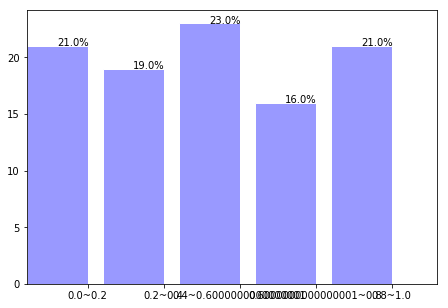

In [67]:
c = np.random.rand(100)
y,x = np.histogram(c,bins=5,range=(0,1))
xticks = [str(x[i])+'~'+str(x[i+1]) for i in range(len(y))]
plt.axes([0.025,0.025,0.95,0.95])
plt.bar(range(len(y)), y, facecolor='#9999ff', edgecolor='white')
for i,j in zip(range(len(y)), y):
    plt.text(i,j,str(float(y[i])/sum(y)*100)+"%")

plt.xlim(-0.4,5)
plt.xticks(np.arange(5)+0.4,xticks)
plt.show()

+ `histogram2d(x, y[, bins, range, normed, weights])`

计算两个数据样本的二维直方图。

[[13. 14. 15. 16.]
 [ 9. 10. 11. 12.]
 [ 5.  6.  7.  8.]
 [ 1.  2.  3.  4.]]


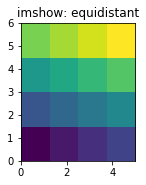

In [68]:
xedges = [0, 1, 1.5, 3, 5]
yedges = [0, 2, 3, 4, 6]
x = np.random.normal(3, 1, 100)
y = np.random.normal(1, 1, 100)
H, xedges, yedges = np.histogram2d(y, x, bins=(xedges, yedges))
H = np.ones((4, 4)).cumsum().reshape(4, 4)
print(H[::-1])
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131)
ax.set_title('imshow: equidistant')
im = plt.imshow(H, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

+ `histogramdd(sample, bins=10, range=None, normed=False, weights=None)`

计算多维直方图

In [71]:
r = np.random.randn(100,3)
H, edges = np.histogramdd(r, bins = (5, 8, 4))
H.shape, edges[0].size, edges[1].size, edges[2].size

((5, 8, 4), 6, 9, 5)

+ `digitize(x, bins, right=False)`

返回输入数组中每个值所属的bin的索引

In [72]:
x = np.array([0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

array([1, 4, 3, 2])

In [73]:
for n in range(x.size):
    print(bins[inds[n]-1], "<=", x[n], "<", bins[inds[n]])

0.0 <= 0.2 < 1.0
4.0 <= 6.4 < 10.0
2.5 <= 3.0 < 4.0
1.0 <= 1.6 < 2.5


In [74]:
x = np.array([1.2, 10.0, 12.4, 15.5, 20.])
bins = np.array([0, 5, 10, 15, 20])
np.digitize(x,bins,right=True)

array([1, 2, 3, 4, 4])

In [75]:
np.digitize(x,bins,right=False)

array([1, 3, 3, 4, 5])

## 多项式计算


多项式函数是变量的整数次幂与系数的乘积之和

$$ f(x)=a_nx^n+a_{n-1}x^{n-1}+...+a_2x^2+a_1x+a_0 $$

在numpy中可以用一个一维数组表示x各项的系数

numpy提供了`polynomial`模块专门处理多项式的

### 基本用法

多项式求值

可以用polynomia.polynomia()将系数转化为一元多项式对象,之后就可以像用函数一样用它了,比如下面的函数:

$$ f(x)=1+2x+3x^2 $$

In [80]:
from numpy.polynomial import Polynomial as P

In [79]:
v1 = np.array([1,2,3])
p = P(v1)
p

注意,长版本的打印输出有三个部分.

第一个是系数,第二个是域,第三个是窗口:他们分别可以通过访问属性`p.coef`,`p.domain`和`p.window`获得

要求x在某个值时f(x)的值,只要简单的代入就行

In [83]:
p(0)

1.0

In [84]:
p(1)

6.0

多项式是天生的universal function,他的参数可以是一个序列

In [85]:
p(np.array([1,2,3,4]))

array([ 6., 17., 34., 57.])

## 多项式运算

### 初等变换

一个多项式可以通过与一个非字符串的数值序列相加或者乘以一个标量来获得一个新的多项式

In [86]:
p*2 #与标量相乘,多项式系数全部与标量相乘,类似向量与标量乘法 

Polynomial([2., 4., 6.], domain=[-1.,  1.], window=[-1.,  1.])

In [87]:
p+p # 与多项式相加,对应系数相加

Polynomial([2., 4., 6.], domain=[-1.,  1.], window=[-1.,  1.])

In [88]:
p+(2,5) # 与另一个序列相加,相当于把序列作为多项式,对应系数相加

Polynomial([3., 7., 3.], domain=[-1.,  1.], window=[-1.,  1.])

In [89]:
p*p # 与多项式相乘各项一一相乘,然后相同次数的系数相加

Polynomial([ 1.,  4., 10., 12.,  9.], domain=[-1.,  1.], window=[-1.,  1.])

In [90]:
p**2 # 幂,与乘法规则相同

Polynomial([ 1.,  4., 10., 12.,  9.], domain=[-1.,  1.], window=[-1.,  1.])

除法:
    
`//`是多项式类的除法运算符，在这方面，多项式被视为整数.与之对应的是求余%,表示除后余下的项

In [91]:
p//P([-1,1]) #相当于多项式分解

Polynomial([5., 3.], domain=[-1.,  1.], window=[-1.,  1.])

In [92]:
p%P([-1,1])

Polynomial([6.], domain=[-1.,  1.], window=[-1.,  1.])

In [93]:
P([ 5.,  3.])*P([-1,1])+[6]

Polynomial([1., 2., 3.], domain=[-1.,  1.], window=[-1.,  1.])

如果要一次求出,可以使用`divmod`方法

In [94]:
quo, rem = divmod(p, P([-1, 1]))

In [95]:
quo

Polynomial([5., 3.], domain=[-1.,  1.], window=[-1.,  1.])

In [96]:
rem

Polynomial([6.], domain=[-1.,  1.], window=[-1.,  1.])

### 多项式因式分解

多项式的根可以使用`np.roots()`方法获得

其意义是令该多项式等于0,则当变量为这些根时满足该等式

In [97]:
r = p.roots()
r

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [98]:
p(r)

array([0.-2.77555756e-16j, 0.+2.77555756e-16j])

In [99]:
np.poly(r)

array([1.        , 0.66666667, 0.33333333])

### 多项式拟合

多项式的拟合使用`Chebyshev`模块 的fit(x,y,deg),来做

其中deg为最高次数
我们用1000个在${-\pi\over 2} \sim{\pi \over 2}$间的值拟合sin(x)

In [100]:
from numpy.polynomial import Chebyshev as T

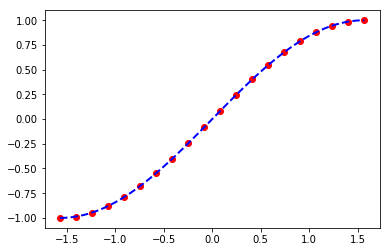

In [101]:
x = np.linspace(-np.pi/2,np.pi/2,20)
y = np.sin(x)
a = T.fit(x,y,5)
xx,yy=a.linspace()
plt.plot(x,y,'o',color="red")
plt.plot(xx,yy,"--",lw=2,color = "blue")
plt.show()

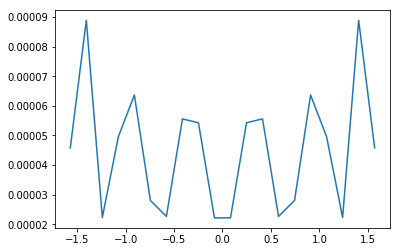

In [102]:
error = np.abs(a(x)-y)#polyval计算多项式的值
plt.plot(x,error)
plt.show()

做3,5,7次多项式的拟合,比较结果误差

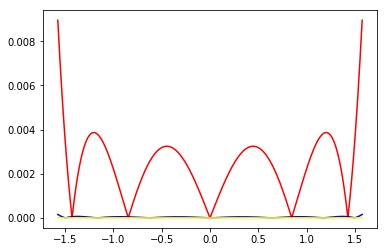

In [103]:
x = np.linspace(-np.pi/2,np.pi/2,1000)
y = np.sin(x)
for i in (3,5,7):
    a = T.fit(x,y,i)
    if i == 3: color = "red"
    elif i == 5: color = "blue"
    else : color = "yellow"
    error = np.abs(a(x)-y)
    plt.plot(x,error,color = color)
plt.show()

## 微积分

用deriv()和integ()可以分别计算多项式的微分和积分

$$ f(x)=3x^2+2x+1 $$

做微分是

$$ f^{'}(x)=6x+2 $$

In [104]:
v1 = np.array([1,2,3])
p = P(v1)
p

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [105]:
p.deriv()

Polynomial([2., 6.], domain=[-1.,  1.], window=[-1.,  1.])

In [106]:
p = P(v1)

$$ f(x)=3x^2+2x+1 $$

做积分是

$$ F(x)=x^3+x^2+x+N $$

N是无法预测的所以置0

In [107]:
p.integ()

Polynomial([0., 1., 1., 1.], domain=[-1.,  1.], window=[-1.,  1.])

## 傅里叶变换


将时域信号变换至频域加以分析的方法称为频谱分析.频谱分析的目的是把复杂的时间历程波形,经过傅里叶变换分解为若干单一的谐波分量来研究,以获得信号的频率结构以及各谐波和相位信息.

对信号进行频谱分析可以获得更多有用信息,如求得动态信号中的各个频率成分和频率分布范围,求出各个频率成分的幅值分布和能量分布,从而得到主要幅度和能量分布的频率值.

由时间函数求频谱函数的傅里叶变换公式就是将该时间函数乘以以频率为系数的指数函数之后,在负无限大到正无限大的整个区间内,对时间进行积分.这样就得到了与这个时间函数对应的.以频率为自变量的频谱函数.频谱函数是信号的频域表示方式.根据上述傅里叶变换公式,可以求出常数的频谱函数为频域中位于零频率处的一个冲激函数,表示直流信号就是一个频率等于零的信号.与此相反冲激函数的频谱函数等于常数,表示冲激函数含有无限多个、频率无限密集的正弦成分.同样的单个正弦波的频谱函数就是频域中位于该正弦波频率处的一对冲激函数.

np中用`np.fft`模块可以做傅里叶变换

### 傅里叶级数

假设:关于一个变量的任意一个周期函数 $f(x)$ ，不论连续或不连续,且函数 $f(x)$ 必须平方可积的，则 $f(x)$ 都可以近似的展开为正弦函数的级数，而正弦函数的参数为变量的倍数,大约就是:

$$f(x)=\sum_k c_k sin kx$$

#### 最常见的表达形式

周期为T的函数f(x)有：

$$\begin{align}
f(x)&=a_0+\sum_{k=1}^\infty{[a_k sin (k{2\pi\over T}x)+b_k cos(k{2\pi\over T}x)]}\\
&=a_0+\sum_{k=1}^\infty{\sqrt{a_k^2+b_k^2} [sin(k{2\pi\over T}x+\theta)]}
\end{align}$$

然后因为有欧拉公式:

$$ cos x={ \frac {e^{ix}+e^{-ix}} 2} $$

$$ sin x={\frac {e^{ix}-e^{-ix}} 2i} $$

所以有:

$$ f(x) = \sum_{k=-\infty}^{+\infty}a_k e^{ik({2\pi\over T})t}$$


### 傅里叶变换:

假设一个函数（信号）是周期的，但是它的周期是无穷大,可以得出:

傅里叶正变换:

$$
F(\omega)=\int_{-\infty}^\infty f(t) e^{-i\omega t}dt
$$

傅里叶反变换:

$$
f(t)={1\over {2\pi}}\int_{-\infty}^\infty F(\omega) e^{-i\omega t}d\omega
$$

于是,我们可以利用傅里叶正变换变到分解状态（或者说频域），然后把它的分量分别处理，再利用反变换回去了.



### numpy中的接口

实域变频域后,函数表现形式有了变化,各个分量有了频率,周期.

numpy中获取和处理频率的工具有

+ fftfreq(n[, d])
    获取连续傅里叶变换分量频率
    
+ rfftfreq(n[, d])
    获取离散傅里叶变换分量频率
    
+ fftshift(x[, axes])
    将0频分量移动到中心
+ ifftshift(x[, axes])	The inverse of fftshift.
     上一操作的反操作
     
### 离散时间信号

在时间上依次出现的数值序列,例如，{…，0.5，1，2，-1，0，5，…}。相邻两个数之间的时间间隔可以是相等的，也可以是不等的。在前一情况下，设时间间隔为T秒,则离散信号可用符号x(nT)来表示（图1）。在间隔T归一化为1的条件下,T可以省略,即将x(nT)表示为x(n)。x(n)既可表示整个序列, 也可表示离散信号在nT瞬间的值。

### 离散傅里叶变换

简称DFT,

python的numpy里的fft模块就是用的这种变换

对于N点序列 $\left\{x[n]\right\}_{0\le n <N}$，它的离散傅里叶变换（DFT）为:

$$\hat{x}[k]=\sum_{n=0}^{N-1} e^{-i\frac{2\pi}{N}nk}x[n] \qquad k = 0,1,\ldots,N-1.$$

其中i是虚数单位

其逆变换为:

$$x\left[n\right]={1 \over N}\sum_{k=0}^{N-1} e^{ i\frac{2\pi}{N}nk}\hat{x}[k] \qquad n = 0,1,\ldots,N-1.$$



### numpy中实现的标准快速傅里叶变换

方法|说明
---|---
fft(a[, n, axis, norm])|	一维空间离散傅里叶变换
ifft(a[, n, axis, norm])|	一维空间离散傅里叶反变换
fft2(a[, s, axes, norm])|	二维空间离散傅里叶变换
ifft2(a[, s, axes, norm])|	二维空间离散傅里叶反变换
fftn(a[, s, axes, norm])|	N维空间离散傅里叶变换
ifftn(a[, s, axes, norm])|	N维空间离散傅里叶反变换

fft的参数是一个数组,这个数组可以理解为一个连续函数按一定周期采样的结果.而这个数组一般都是2的整数次幂.比如256,128,64这样

以下是标准傅里叶变换的例子

+ 一维空间

我们以一个矩形波为例子

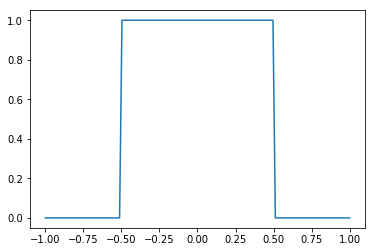

In [19]:
t = np.linspace(-1, 1, 128,endpoint=True)
tz = list(map(lambda x: 1 if (x > -0.5 and x<0.5) else 0,t))
plt.plot(t,tz)
plt.show()

/Users/huangsizhe/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


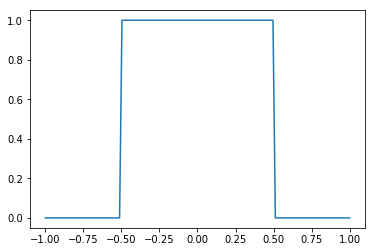

In [20]:
sp = np.fft.fft(tz)
re = np.fft.ifft(sp)#傅里叶逆变换
plt.plot(t,re)
plt.show()

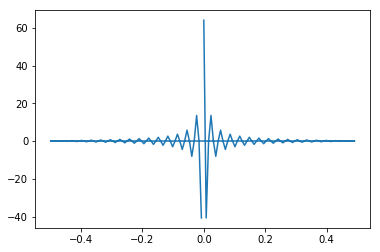

In [21]:
freq = np.fft.fftfreq(t.shape[-1])#获取频率
plt.plot(freq, sp.real)
plt.show()

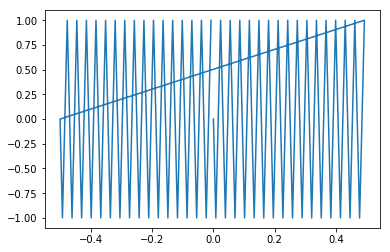

In [22]:
plt.plot(freq, sp.imag)
plt.show()

+ 二维空间(常用图像处理)

In [23]:
a = np.mgrid[:5, :5][0]
a

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [24]:
np.fft.fft2(a)

array([[ 50.  +0.        j,   0.  +0.        j,   0.  +0.        j,
          0.  +0.        j,   0.  +0.        j],
       [-12.5+17.20477401j,   0.  +0.        j,   0.  +0.        j,
          0.  +0.        j,   0.  +0.        j],
       [-12.5 +4.0614962 j,   0.  +0.        j,   0.  +0.        j,
          0.  +0.        j,   0.  +0.        j],
       [-12.5 -4.0614962 j,   0.  +0.        j,   0.  +0.        j,
          0.  +0.        j,   0.  +0.        j],
       [-12.5-17.20477401j,   0.  +0.        j,   0.  +0.        j,
          0.  +0.        j,   0.  +0.        j]])

+ n维空间

In [25]:
b = np.mgrid[:3, :3, :3][0]
b

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]])

In [26]:
np.fft.fftn(b, axes=(1, 2))

array([[[ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]],

       [[ 9.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]],

       [[18.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]]])

In [27]:
np.fft.fftn(b, (2, 2), axes=(0, 1))

array([[[ 2.+0.j,  2.+0.j,  2.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]],

       [[-2.+0.j, -2.+0.j, -2.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j]]])

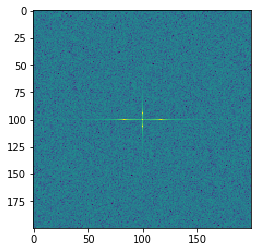

In [28]:
[X, Y] = np.meshgrid(2 * np.pi * np.arange(200) / 12,
                      2 * np.pi * np.arange(200) / 34)
S = np.sin(X) + np.cos(Y) + np.random.uniform(0, 1, X.shape)
FS = np.fft.fftn(S)
plt.imshow(np.log(np.abs(np.fft.fftshift(FS))**2))
plt.show()

numpy中其他的傅里叶变换还有


实数快速傅里叶变换:

方法|说明
---|---
rfft(a[, n, axis, norm])|	实数输入的一维空间离散傅里叶变换
irfft(a[, n, axis, norm])|	实数输入的一维空间离散傅里叶反变换
rfft2(a[, s, axes, norm])|	实数输入的二维空间离散傅里叶变换
irfft2(a[, s, axes, norm])|	实数输入的二维空间离散傅里叶反变换
rfftn(a[, s, axes, norm])|	实数输入的N维空间离散傅里叶变换
irfftn(a[, s, axes, norm])|	实数输入的N维空间离散傅里叶反变换


Hermitian傅里叶变换:

方法|说明
---|---
hfft(a[, n, axis, norm])|	计算实域中埃尔米特对称的信号的快速傅里叶变换
ihfft(a[, n, axis, norm])|	计算实域中埃尔米特对称的信号的快速傅里叶反变换

他们用法与上面的相同就不一一描述了

## 窗口函数

在信号处理中，窗函数(window function)是一种除在给定区间之外取值均为0的实函数。譬如：在给定区间内为常数而在区间外为0的窗函数被形象地称为矩形窗。任何函数与窗函数之积仍为窗函数，所以相乘的结果就像透过窗口“看”其他函数一样。窗函数在频谱分析、滤波器设计、波束形成、以及音频数据压缩（如在Ogg Vorbis音频格式中）等方面有广泛的应用。

numpy中提供了几种常见的窗函数

函数|说明
---|---
bartlett(M)	|Bartlett窗口函数
blackman(M)	|Blackman 窗口函数
hamming(M)	|Hamming窗口函数
hanning(M)	|Hanning窗口函数
kaiser(M, beta)	|Kaiser窗口函数

### bartlett窗

$$ w(n)=\frac{2}{N-1}\cdot\left(\frac{N-1}{2}-\left |n-\frac{N-1}{2}\right |\right)\, $$

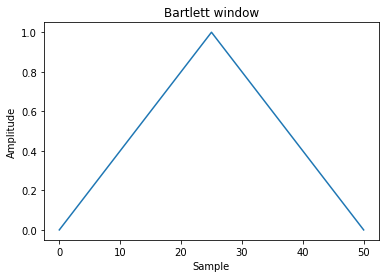

In [29]:
window = np.bartlett(51)
plt.plot(window)
plt.title("Bartlett window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Blackman窗

$$ 
w(n)=a_0 - a_1 \cos \left ( \frac{2 \pi n}{N-1} \right) + a_2 \cos \left ( \frac{4 \pi n}{N-1} \right)
$$
$$
{\displaystyle a_{0}=0.42;\quad a_{1}=0.5;\quad a_{2}=0.08\,} a_0=0.42;\quad a_1=0.5;\quad a_2=0.08\,
$$

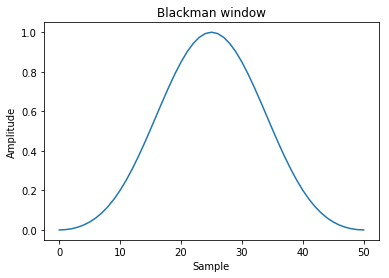

In [30]:
window = np.blackman(51)
plt.plot(window)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Hamming窗

$$ w(n)=0.53836 - 0.46164\; \cos \left ( \frac{2 \pi n}{N-1} \right) $$

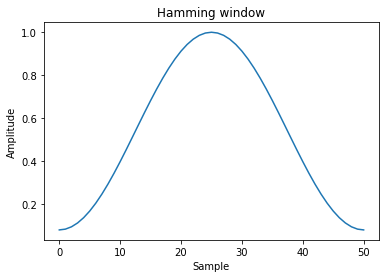

In [31]:
window = np.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Hanning窗

$$ w(n)= 0.5\; \left(1 - \cos \left ( \frac{2 \pi n}{N-1} \right) \right) $$

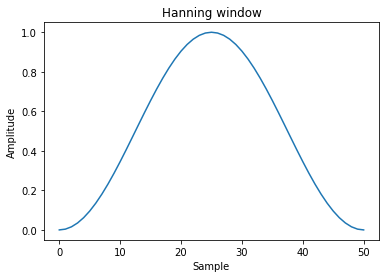

In [32]:
window = np.hanning(51)
plt.plot(window)
plt.title("Hanning window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Kaiser窗

$$ w(n)=\frac{I_0\Bigg (\pi\alpha \sqrt{1 - (\begin{matrix} \frac{2 n}{N-1} \end{matrix}-1)^2}\Bigg )} {I_0(\pi\alpha)} $$

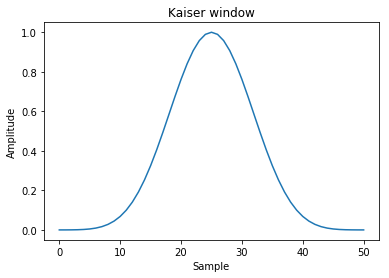

In [33]:
window = np.kaiser(51, 14)
plt.plot(window)
plt.title("Kaiser window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

## 卷积

卷积运算符经常出现在信号处理中,其中它模拟线性时不变系统对信号的影响.在概率理论中,两个独立随机变量的和根据它们各自的分布的卷积来分布.
**离散**卷积运算定义为:

$$ (a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m] $$

numpy提供了通用的卷积操作`convolve(a, v, mode='full')`


其中前两个参数都是一维的输入向量,而mode则提供了可选的三种运算规则,它可以有3种选项

+ full
    默认情况下，模式为“full”。这在每个重叠点处返回卷积，其输出形状为(N M-1,).在卷积的端点，信号不完全重叠，并且可以看到边界效应。
    
+ same
    模式same返回长度max（M，N）的输出。边界效应仍然可见。
    
+ valid
    模式'valid'返回长度为max(M,N)-min(M,N)+1.卷积产物仅针对信号完全重叠的点给出。信号边界外的值没有效果。

In [76]:
np.convolve([1, 2, 3], [0, 1, 0.5])

# a相当于[...0,0,1,2, 3 ,0,0,...]
# v相当于[...0,0,0,1,0.5,0,0,...]
# [0*0.5+0*1+1*0+2*0+3*0,
# 0*0.5+1*1+2*0+3*0,
# 1*0.5+2*1+3*0,
# 1*0+2*0.5+3*1+0*0,
# 1*0+2*0+3*0.5+0*1+0*0]

array([0. , 1. , 2.5, 4. , 1.5])

In [77]:
np.convolve([1,2,3],[0,1,0.5], 'same')

array([1. , 2.5, 4. ])

In [78]:
np.convolve([1,2,3],[0,1,0.5], 'valid')

array([2.5])

## 财务函数

numpy提供了简单的财务分析函数

### `fv(rate, nper, pmt, pv[, when])`求按比率计算n步后的值

例如:现在存100美元,且每月存100美元,假设利率是5%,6%,7%（每月）复利,求10年后的未来价值是多少


In [34]:
a = np.array((0.05, 0.06, 0.07))/12
np.fv(a, 10*12, -100, -100)

array([15692.92889434, 16569.87435405, 17509.44688102])

### `pv(rate, nper, pmt[, fv, when])`求按比率计算n步前的值

其实就是前一函数的反函数

In [35]:
b = np.array([ 15692.92889434,  16569.87435405,  17509.44688102])
np.pv(a, 10*12, -100, b)

array([-100., -100., -100.])

### `npv(rate, values)`净现值

values为现金流量时间序列的价值。
现金流“事件”之间的（固定）时间间隔必须与给出费率的时间间隔相同（即，如果费率是每年，则恰好一年被理解为在每个现金流事件之间流逝）。
按惯例，投资或“存款”是负数，收入或“提款”是正数;
值必须以初始投资开始，因此值[0]通常为负值。

净现值是一项投资所产生的未来现金流的折现值与项目投资成本之间的差值。
净现值指标是反映项目投资获利能力的指标。

+ 决策标准：
    + 净现值≥0 方案可行；
    + 净现值＜0 方案不可行；
    + 净现值均＞0 净现值最大的方案为最优方案。
+ 优点：
    + 考虑了资金时间价值，增强了投资经济性的评价；
    + 考虑了全过程的净现金流量，体现了流动性与收益性的统一；
    + 考虑了投资风险，风险大则采用高折现率，风险小则采用低折现率。
+ 缺点：
    + 净现值的计算较麻烦，难掌握；
    + 净现金流量的测量和折现率较难确定；
    + 不能从动态角度直接反映投资项目的实际收益水平；
    + 项目投资额不等时，无法准确判断方案的优劣。

numpy中的净现值使用这个公式

$$ \sum_{t=0}^{M-1}{\frac{values_t}{(1+rate)^{t}}}$$

In [36]:
np.npv(0.281,[-100, 39, 59, 55, 20])

-0.00847859163845488

### `pmt(rate, nper, pv, fv=0, when='end')`计算贷款本金加利息的付款


+ nper是计算次数
+ pv是本金

In [37]:
np.pmt(0.075/12, 12*15, 200000)

-1854.0247200054619

+ `ppmt(rate, per, nper, pv, fv=0.0, when='end')`
计算贷款本金的付款。


+ `ipmt(rate, per, nper, pv, fv=0.0, when='end')`
计算付款的利息部分。

### `irr(values)`返回内部收益率(IRR)

numpy使用公式

$$ \sum_{t=0}^M{\frac{v_t}{(1+irr)^{t}}} = 0 $$

In [39]:
print(round(np.irr([-100, 39, 59, 55, 20]), 5))

print(round(np.irr([-100, 0, 0, 74]), 5))

print(round(np.irr([-100, 100, 0, -7]), 5))

print(round(np.irr([-100, 100, 0, 7]), 5))

print(round(np.irr([-5, 10.5, 1, -8, 1]), 5))

0.28095
-0.0955
-0.0833
0.06206
0.0886


### `mirr(values, finance_rate, reinvest_rate)`修改后的内部收益率。

### `nper(rate, pmt, pv, fv=0, when='end')`计算定期付款的数量。

计算公式为:

$$ fv + pv*(1+rate)**nper + pmt*(1+rate*when)/rate*((1+rate)**nper-1) = 0 $$

如果`rate = 0`,那么:

$$ fv + pv + pmt*nper = 0 $$

In [42]:
print(np.nper(0.07/12, -150, 8000))

64.07334877066185


### rate(nper, pmt, pv, fv, when='end', guess=0.1, tol=1e-06, maxiter=100)计算每个周期的利率。

通过迭代求解(非线性)方程来计算利息率:


$$ fv + pv*(1+rate)**nper + pmt*(1+rate*when)/rate * ((1+rate)**nper - 1) = 0 $$

## 向量间计算

向量间计算多数都是对应项操作,这个ufunc可以直接支持.比较特殊的操作是点乘和求夹角

### 求模

向量中模的定义为各个项的平方和开方

$$ |v| = \sqrt {\sum_{i=0}^{N} {v_i^2}} $$

numpy中使用`np.linalg.norm(v)`来计算

In [118]:
v_1 = np.array([3,5])
l_v1 = np.linalg.norm(v_1)
print(l_v1)

5.830951894845301


### 叉乘(外积)

$$ |C| = | v_1 \times v_2 |= |v_1| |v_2|sin<a,b> $$


C的方向用右手定则,右手4指从v_1不超过180度转向v_2时大拇指的方向即为C的方向.

numpy中使用`np.linalg.dot`来计算其值,或者使用python3.6定义的矩阵乘法符号`@`来计算

In [121]:
v_1 = np.array([3,5])
v_2 = np.array([4,2])
v_1@v_2

22

## 矩阵计算

通常我们认为向量是一维的矩阵,

## 张量计算